***
# __Ridge & Lasso Regression, ElasticNet, and Non Linear Regression__
***

**Lasso (L1) and Ridge (L2) Regularization**
Regularization is a technique to discourage the complexity of the model. It does this by penalizing the loss function. This helps to solve the overfitting problem.

- L1 regularization (also called Lasso)
- L2 regularization (also called Ridge)
- L1/L2 regularization (also called Elastic net)

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

#### __Difference between L1 and L2 regularization__
L1 Regularization
- L1 penalizes sum of absolute value of weights.
- L1 has a sparse solution
- L1 has multiple solutions
- L1 has built in feature selection
- L1 is robust to outliers
- L1 generates model that are simple and interpretable but cannot learn complex patterns

L2 Regularization
- L2 regularization penalizes sum of square weights.
- L2 has a non sparse solution
- L2 has one solution
- L2 has no feature selection
- L2 is not robust to outliers
- L2 gives better prediction when output variable is a function of all input features
- L2 regularization is able to learn complex data patterns

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from yellowbrick.regressor import PredictionError, ResidualsPlot

from sklearn.preprocessing import PowerTransformer
from feature_engine.outliers import Winsorizer

from sklearn.feature_selection import RFE

In [9]:
data = fetch_california_housing()

california_housing = pd.DataFrame(data.data, columns=data.feature_names)
california_housing['Price'] = data.target

features = list(data.feature_names)
print('features:\n', features)

california_housing.head()

features:
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Outliers Removal Selected
Transformations Selected


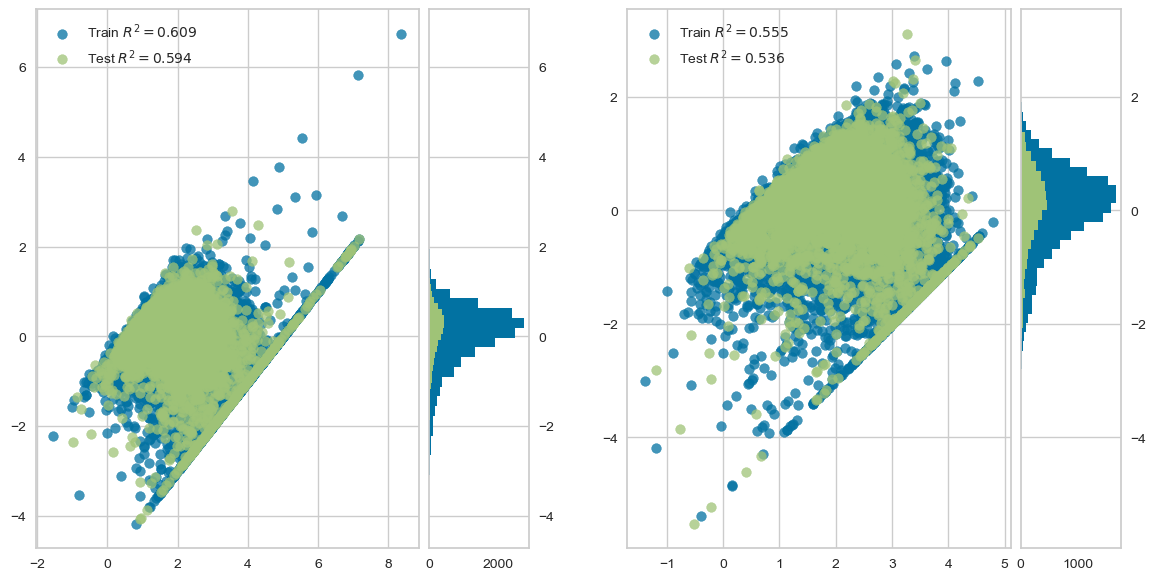

In [10]:
def run_Outliers_Transformations_Linear_Regression(df, cols, outliers=True, transformations=True):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(california_housing[features], california_housing['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features and Removed Outliers and Yeo-Johnson Transformation
    X_train, X_test, y_train, y_test = train_test_split(df, california_housing['Price'],
                test_size=0.2,
                random_state=0)
    
    #outliers removal
    if outliers == True:
        print('Outliers Removal Selected')
        winsorizer = Winsorizer(#distribution='skewed',
                           tail='both',
                           fold=1.5,
                           variables=cols)

        X_train = winsorizer.fit_transform(X_train)
        X_test = winsorizer.transform(X_test)
    
    #transformations
    if transformations==True:
        print('Transformations Selected')
        transformer = PowerTransformer(method='yeo-johnson', standardize=True)
        X_train = transformer.fit_transform(X_train)
        X_test = transformer.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Outliers_Transformations_Linear_Regression(california_housing[features], features)

In [11]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


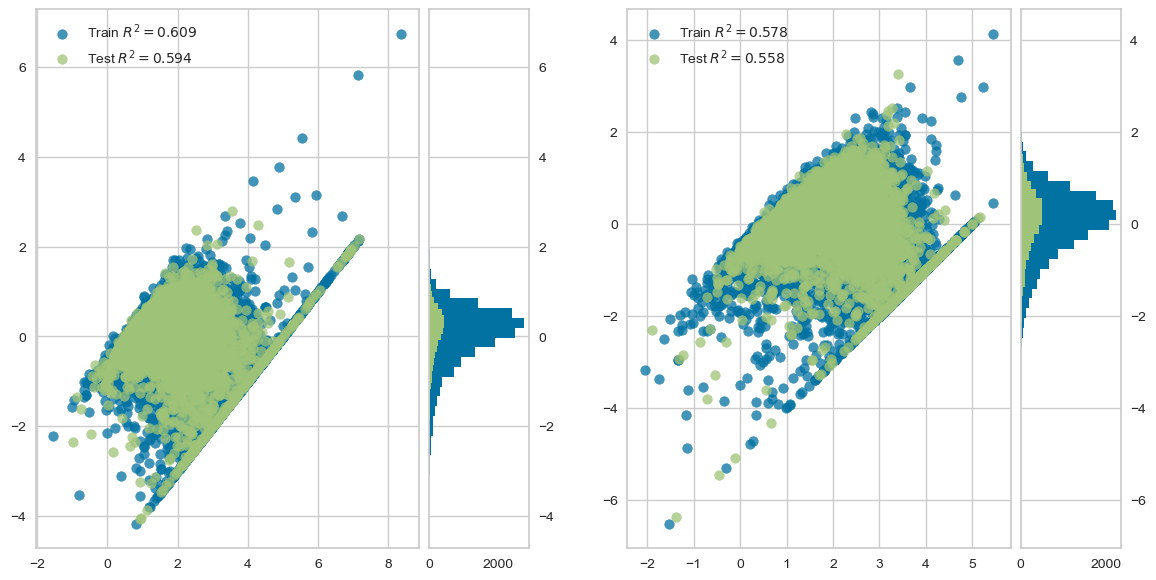

In [12]:
best_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude']
run_Outliers_Transformations_Linear_Regression(california_housing[best_features], best_features, outliers=False)

In [14]:
#best_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population' ]
#outliers_features = ['AveOccup', 'Latitude', 'Longitude']
#run_Outliers_Transformations_Linear_Regression(boston[best_features], outliers_features, outliers=True)

***
## __Ridge Regression__

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

So ridge regression puts constraint on the coefficients (w).<br> 
The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized.

In [15]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[features],
                california_housing['Price'],
                test_size=0.2,
                random_state=0)

model = Ridge(alpha=.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('r2 Score: ', r2_score(y_test, y_pred))

r2 Score:  0.5943231076401849


In [17]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[features],
                california_housing['Price'],
                test_size=0.2,
                random_state=0)

model = RidgeCV(alphas=(.01,0.05, 0.1, 0.4, 0.5, 1, 2, 3), scoring='r2')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('r2 Score: ', r2_score(y_test, y_pred))

r2 Score:  0.5942759845729912


In [18]:
model.alpha_

3.0

***
##  __Lasso Regression__

Lasso, or Least Absolute Shrinkage and Selection Operator, is quite similar conceptually to ridge regression. It also adds a penalty for non-zero coefficients, but unlike ridge regression which penalizes sum of squared coefficients (the so-called L2 penalty), lasso penalizes the sum of their absolute values (L1 penalty). As a result, for high values of λ, many coefficients are exactly zeroed under lasso, which is never the case in ridge regression.

In [19]:
from sklearn.linear_model import LassoCV

In [20]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[features],
                california_housing['Price'],
                test_size=0.2,
                random_state=0)

model = LassoCV(eps=0.0001, n_alphas=100, cv=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('r2 Score: ', r2_score(y_test, y_pred))

r2 Score:  0.5921292263005391


In [21]:
model.coef_

array([ 4.20300692e-01,  9.55051915e-03, -7.34194979e-02,  4.63260326e-01,
       -6.50524525e-06, -4.76147015e-03, -4.17103555e-01, -4.27840526e-01])

In [22]:
pd.Series(model.coef_, features)

MedInc        0.420301
HouseAge      0.009551
AveRooms     -0.073419
AveBedrms     0.463260
Population   -0.000007
AveOccup     -0.004761
Latitude     -0.417104
Longitude    -0.427841
dtype: float64

***
## __Elastic Net__

In [23]:
from sklearn.linear_model import ElasticNetCV

In [24]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[features],
                california_housing['Price'],
                test_size=0.2,
                random_state=0)

model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], tol=0.01, alphas=(.01,0.05, 0.1, 0.4, 0.5, 1, 2, 3))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('r2 Score: ', r2_score(y_test, y_pred))

r2 Score:  0.5913980731537005


In [25]:
pd.Series(model.coef_, features)

MedInc        0.417840
HouseAge      0.009655
AveRooms     -0.068469
AveBedrms     0.434487
Population   -0.000006
AveOccup     -0.004854
Latitude     -0.414052
Longitude    -0.424254
dtype: float64

***
## __Polynomial Regression__

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
X_train, X_test, y_train, y_test = train_test_split(california_housing[features],
                california_housing['Price'],
                test_size=0.2,
                random_state=0)

polynomial = PolynomialFeatures(degree=2)
X_train = polynomial.fit_transform(X_train)
X_test = polynomial.transform(X_test)

In [28]:
X_train.shape

(16512, 45)

In [29]:
def run_Linear_Regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()    
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
    

***
## __Polynomial Regression with Variable Transformations__ 

E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Outliers Removal Selected
Transformations Selected


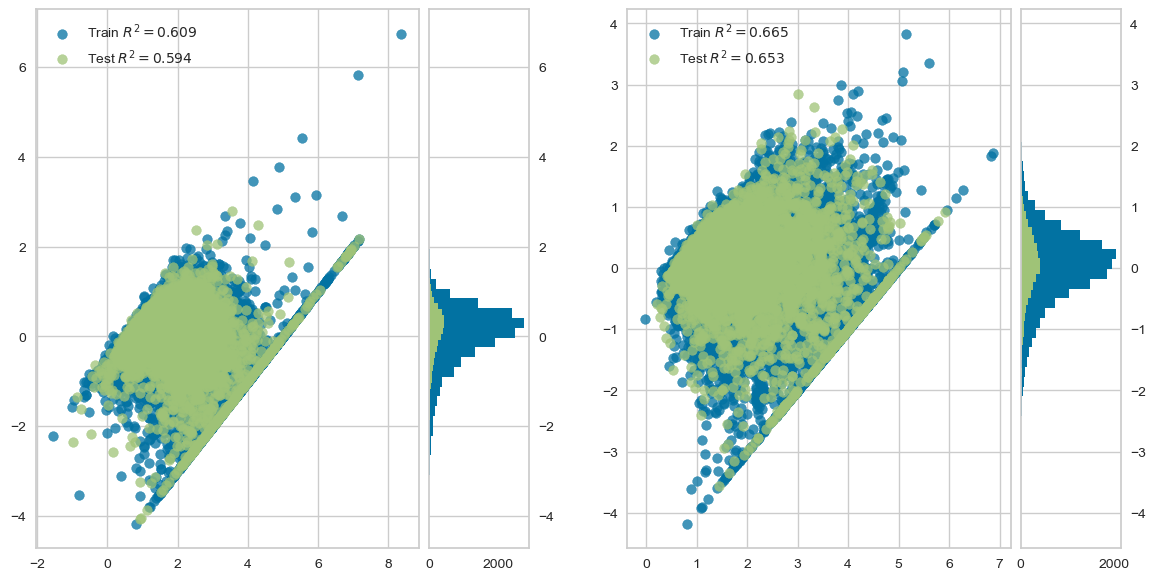

In [30]:
def run_Outliers_Transformations_NonLinear_Regression(df, cols, outliers=True, transformations=True):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(california_housing[features], california_housing['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features and Removed Outliers and Yeo-Johnson Transformation
    X_train, X_test, y_train, y_test = train_test_split(df, california_housing['Price'],
                test_size=0.2,
                random_state=0)
    
    #outliers removal
    if outliers == True:
        print('Outliers Removal Selected')
        winsorizer = Winsorizer(#distribution='skewed',
                           tail='both',
                           fold=1.5,
                           variables=cols)

        X_train = winsorizer.fit_transform(X_train)
        X_test = winsorizer.transform(X_test)
    
    #transformations
    if transformations==True:
        print('Transformations Selected')
        transformer = PowerTransformer(method='yeo-johnson', standardize=True)
        X_train = transformer.fit_transform(X_train)
        X_test = transformer.transform(X_test)
        
        
    # non linear transformations
    polynomial = PolynomialFeatures(degree=2)
    X_train = polynomial.fit_transform(X_train)
    X_test = polynomial.transform(X_test)
    
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Outliers_Transformations_NonLinear_Regression(california_housing[features], features, 
                                                  outliers=True, transformations=True)

***
## __Polynomial Regression with Feature Selection__

In [31]:
def increamental_RFE(n_features_to_select):
    X_train, X_test, y_train, y_test = train_test_split(california_housing[features],
                    california_housing['Price'],
                    test_size=0.2,
                    random_state=0)

    model = LinearRegression()

    selector = RFE(model, n_features_to_select=n_features_to_select, step=1)
    selector.fit(X_train, y_train)

    selected_features = list(X_train.columns[selector.support_])
    print('Selected Features for Training: ', selected_features)
    
    
    outliers_features = ['LSTAT', 'DIS']

    run_Outliers_Transformations_NonLinear_Regression(california_housing[selected_features], outliers_features,
                                              outliers=False, transformations=True)

Selected Features for Training:  ['Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


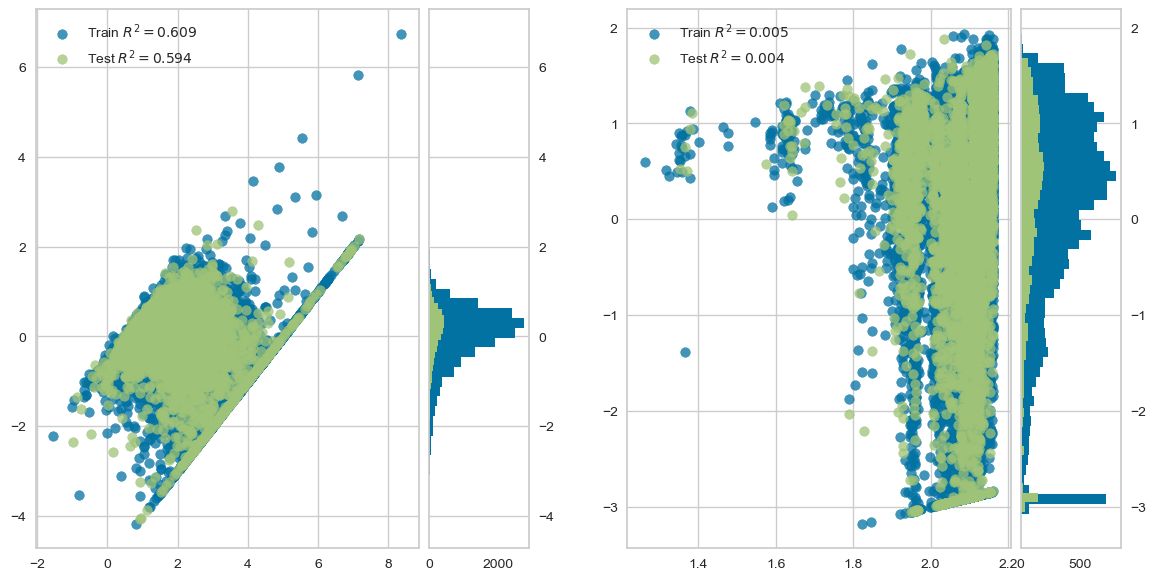




Selected Features for Training:  ['Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


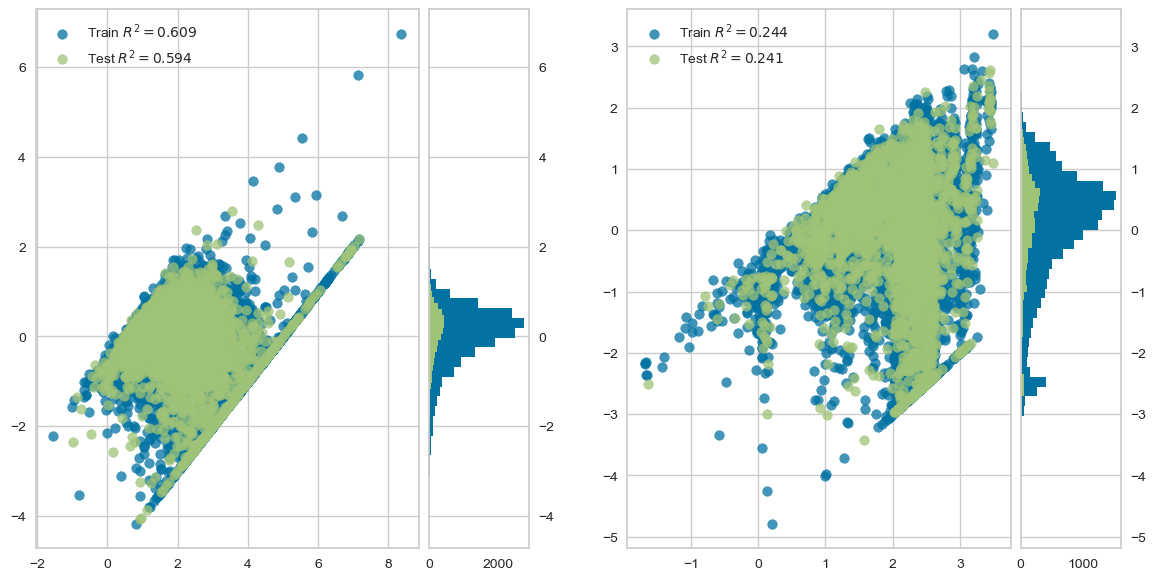




Selected Features for Training:  ['MedInc', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


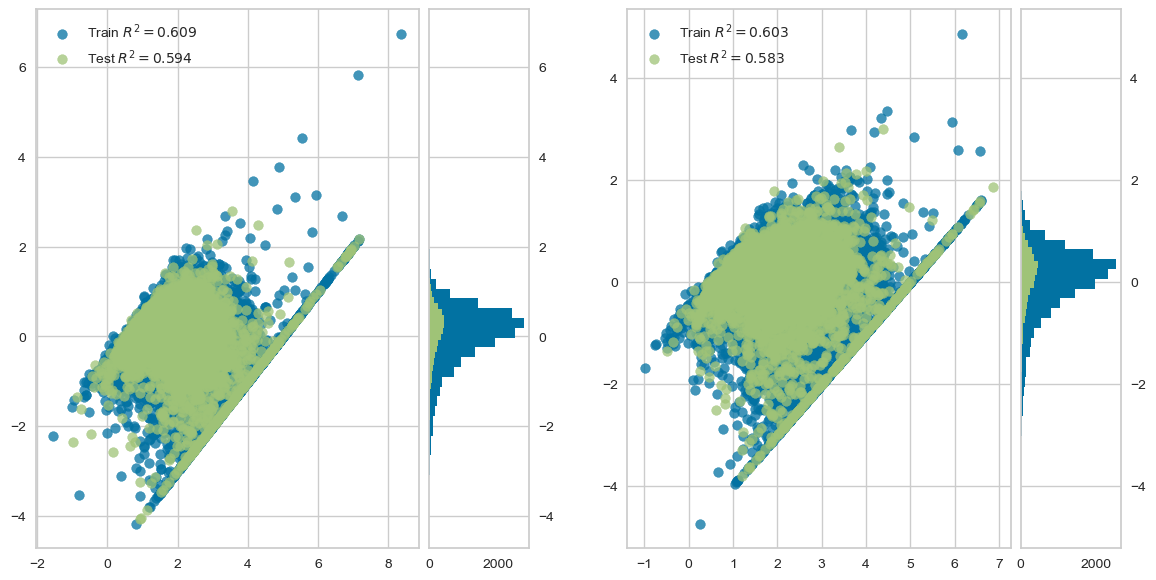




Selected Features for Training:  ['MedInc', 'AveBedrms', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


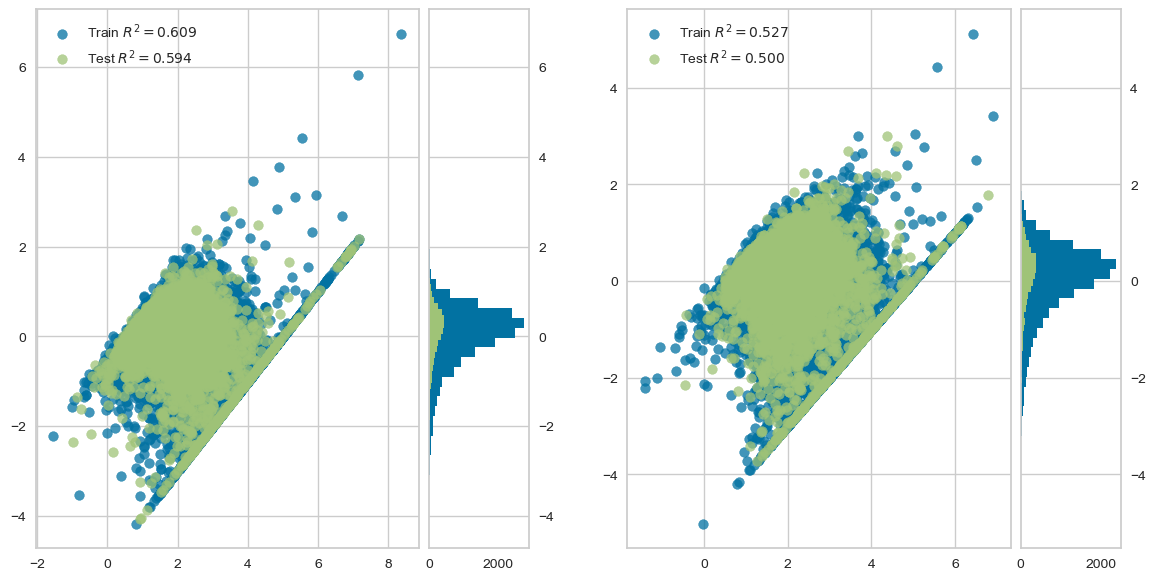




Selected Features for Training:  ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


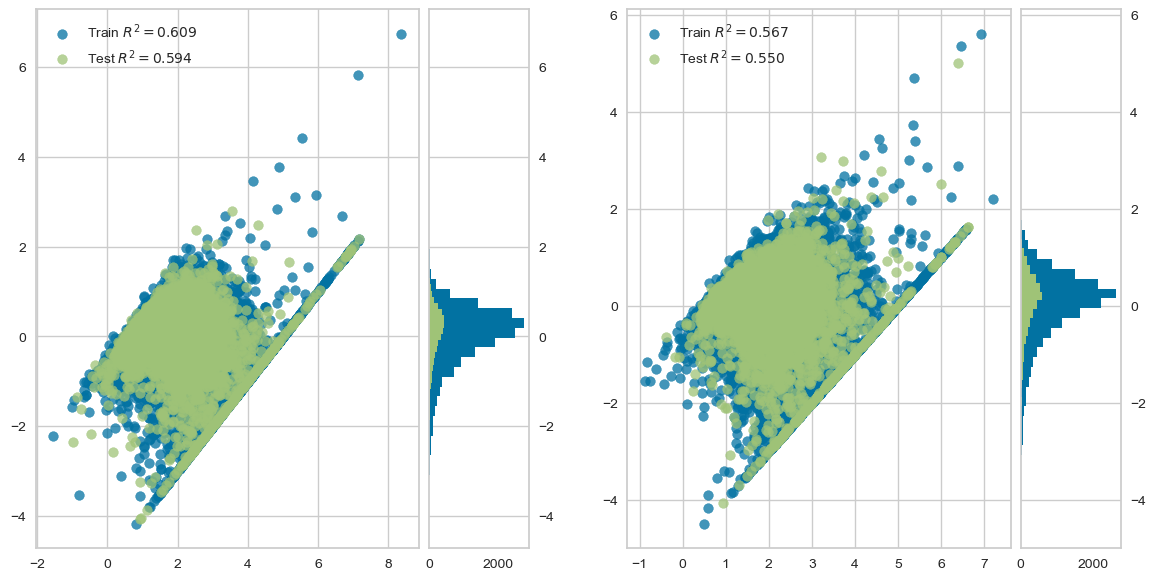




Selected Features for Training:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


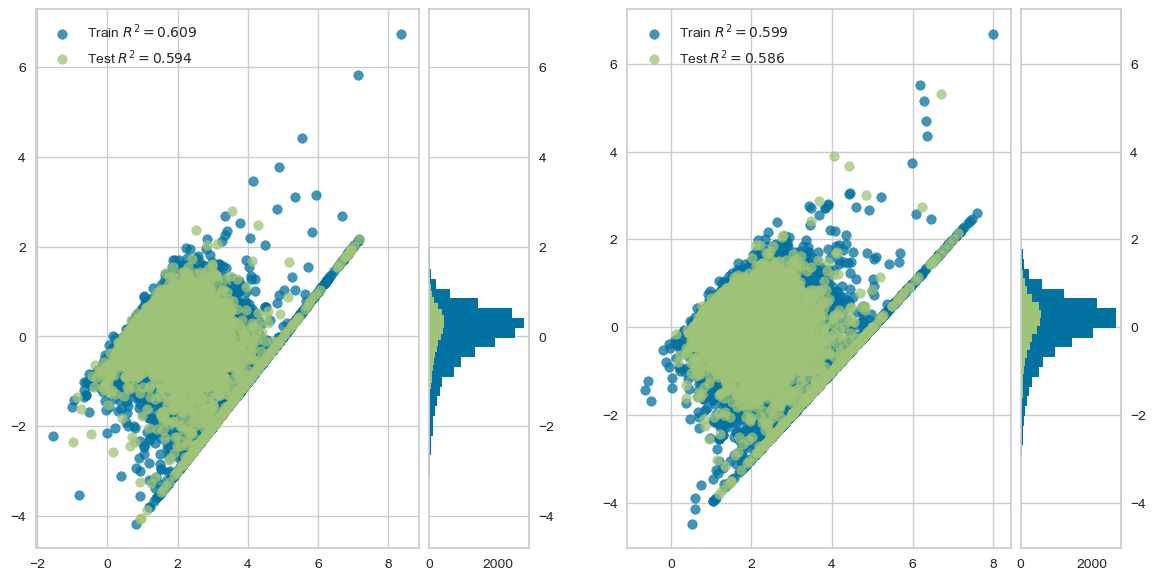




Selected Features for Training:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


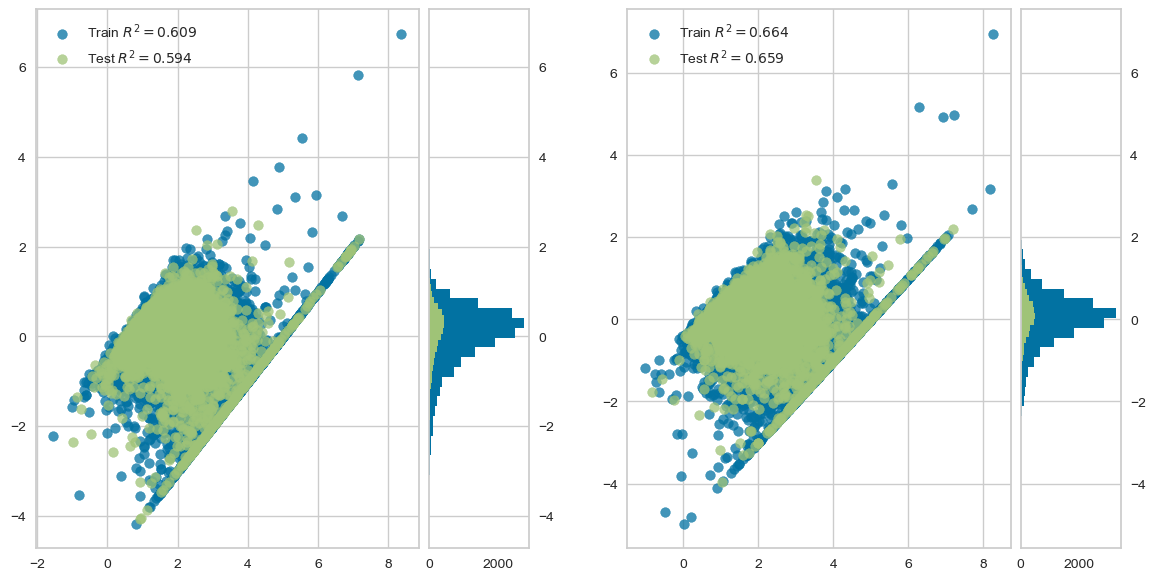




Selected Features for Training:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


E:\Data_Science_Envs\Linear_Reg_Env\env4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Transformations Selected


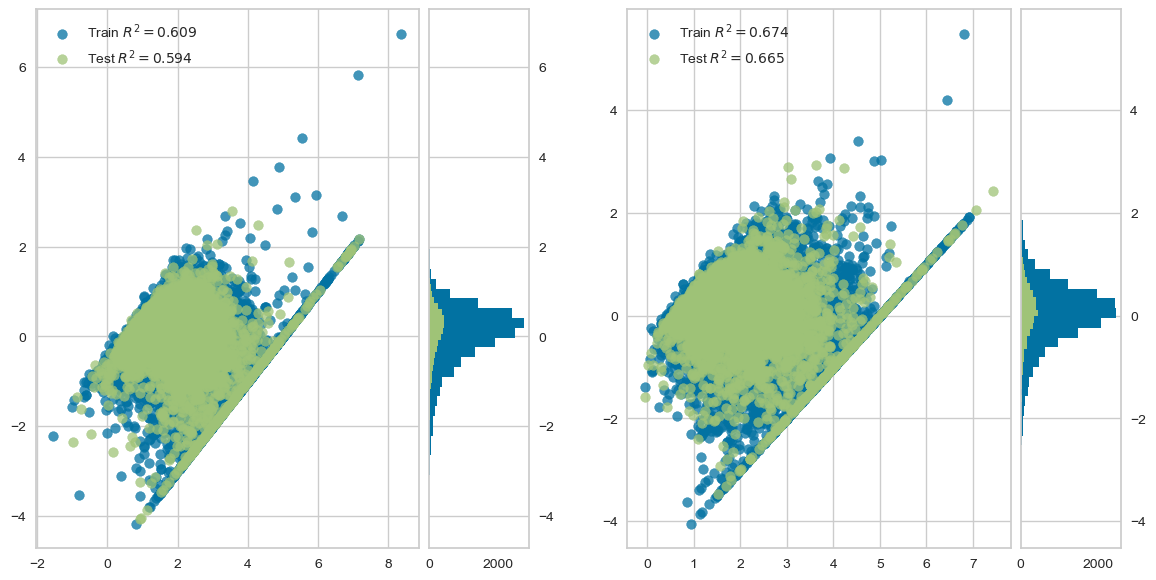

In [32]:
for i in range(1, len(features)+1):
    increamental_RFE(i)
    
    plt.show()
    print('\n\n')